## import the required library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir(r'C:\Users\ksiva\Downloads\Triffic-Sign-Detection')

## Store data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'C:\\Users\\ksiva\\Downloads\\Triffic-Sign-Detection'

## For each of the 43 types of traffic signs, we have around 50K photos. All of those photos must now be processed.

In [4]:
data =[]
labels = []
classes = 43 
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:             
            image = Image.open(path +'\\'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data.append(image)             
            labels.append(i)
        except Exceptionas as e:
            print(e)

## convert the image data list into NumPy array

In [5]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape) 

(39209, 30, 30, 3) (39209,)


## Save Labels & Data for future use

In [8]:
#os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## build the model

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 33s 33ms/step - loss: 2.0602 - accuracy: 0.4734 - val_loss: 0.6448 - val_accuracy: 0.8481
Epoch 2/20
981/981 [==============================] - 32s 32ms/step - loss: 0.7531 - accuracy: 0.7819 - val_loss: 0.2580 - val_accuracy: 0.9350
Epoch 3/20
981/981 [==============================] - 38s 39ms/step - loss: 0.5148 - accuracy: 0.8477 - val_loss: 0.1770 - val_accuracy: 0.9499
Epoch 4/20
981/981 [==============================] - 40s 41ms/step - loss: 0.4391 - accuracy: 0.8695 - val_loss: 0.1288 - val_accuracy: 0.9640
Epoch 5/20
981/981 [==============================] - 40s 41ms/step - loss: 0.3578 - accuracy: 0.8971 - val_loss: 0.1103 - val_accuracy: 0.9695
Epoch 6/20
981/981 [==============================] - 40s 41ms/step - loss: 0.3449 - accuracy: 0.9016 - val_loss: 0.1208 - val_accuracy: 0.9688
Epoch 7/20
981/981 [==============================] - 42s 43ms/step - loss: 0.3316 - accuracy: 0.9096 - val_loss: 0.1052 - val_accuracy:

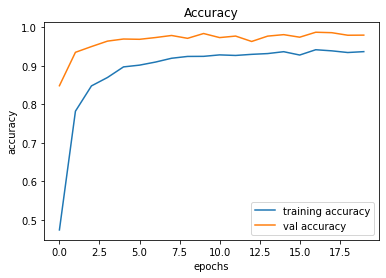

In [15]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

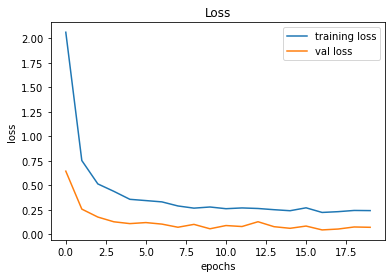

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## testing on Test data

In [17]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [18]:
X_test, label = testing('Test.csv')

In [19]:
Y_pred = model.predict(X_test) 
Y_pred = np.argmax(Y_pred,axis=1)
Y_pred

array([16,  1, 38, ..., 32,  7, 10], dtype=int64)

In [ ]:
#Scores
scores = model.evaluate(X_test, y_test, verbose=1)
print("Loss of the model is", round(scores[0]*100, 2), '%')
print("Accuracy of the model is", round(scores[1]*100, 2), '%')

In [ ]:
model.save("./training/TSD-trained.h5")